In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\Jaswanth Kunisetty\\Downloads\\Python ML\\Projects\\SST-2\\train.tsv", sep = '\t')
df.head()

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0


([<matplotlib.patches.Wedge at 0x1683b25fc70>,
 [Text(0.19873379033525904, 1.0818987385975554, '0'),
  Text(-0.19873389162992838, -1.0818987199907504, '1')],
 [Text(0.10840024927377766, 0.5901265846895756, '44.2%'),
  Text(-0.10840030452541546, -0.5901265745404092, '55.8%')])

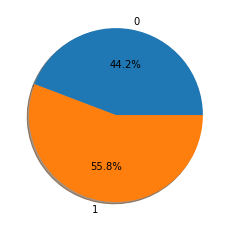

In [6]:
Data = [sum(df["label"]==0), sum(df["label"]==1)]
plt.pie(Data, labels = [0,1], center = (0,0), shadow = True, autopct = '%1.1f%%')

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['sentence']).toarray()
features.shape
X=pd.DataFrame(data=features)
Y=df["label"].astype(str)
df['label']=df['label'].astype(str)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X[0:1000], Y[0:1000], random_state = 0)

clf = GaussianNB().fit(X_train, y_train)

In [9]:
y_pred=clf.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69       118
           1       0.74      0.57      0.64       132

    accuracy                           0.67       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.68      0.67      0.67       250



In [11]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

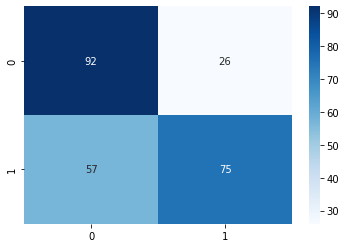

In [12]:
sns.heatmap(cm, annot = True, cmap = "Blues")

### Lime Explaination

In [20]:
from lime.lime_text import LimeTextExplainer
class_names=['0','1']
explainer = LimeTextExplainer(class_names=class_names)
idx = 30
exp = explainer.explain_instance(tfidf.transform(df.sentence[idx]).toarray(), clf.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability=', clf.predict_proba([df.sentence[idx]])[0,1])
print('True class: %s' % df.label[idx])
exp.as_list()

ValueError: Iterable over raw text documents expected, string object received.

In [25]:
TfidfTransformer.fit_transform(df.sentence[idx]).toarray()

TypeError: transform() missing 1 required positional argument: 'X'

In [27]:
clf.predict_proba()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [32]:
df.sentence[idx]

'the action is stilted '